In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get the train and test data sets for CIFAR-100
ds_train, ds_info_train = tfds.load('cifar100', split='train', with_info=True)
ds_test, ds_info_test = tfds.load('cifar100', split='test', with_info=True)

In [3]:
# get the size of the traing set
training_size = ds_train.reduce(0, lambda x, _: x+1).numpy()
# get the size of the test set
test_size = ds_test.reduce(0, lambda x, _: x+1).numpy()
print('There are '+ str(training_size) +' images in the training set')
print('There are '+ str(test_size) +' images in the test set')

There are 50000 images in the training set
There are 10000 images in the test set


In [4]:
# get the label names
class_names = ds_info_train.features['label'].names
coarse_class_names = ds_info_train.features['coarse_label'].names

print('There are ' + str(len(class_names)) + ' fine labels')
print('There are ' + str(len(coarse_class_names)) + ' coarse labels')

There are 100 fine labels
There are 20 coarse labels


In [5]:
# get the shape of the image in the train set
ds_train.element_spec['image'].shape

TensorShape([32, 32, 3])

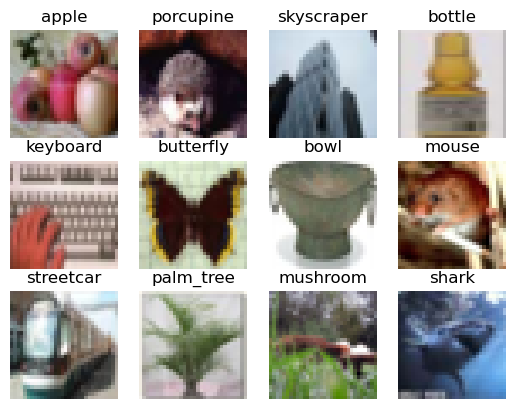

In [6]:
# show images with fine labels
for i, example in enumerate(ds_train.shuffle(1000).take(12)):
    image = example['image']
    label = example['label']
    plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')
plt.show()

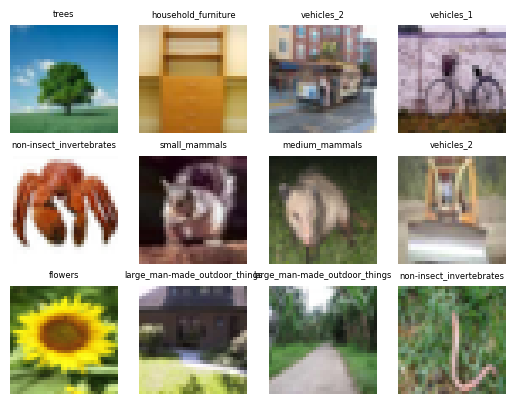

In [7]:
# show images with coarse labels
for i, example in enumerate(ds_train.shuffle(1000).take(12)):
    image = example['image']
    coarse_label = example['coarse_label']
    plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(coarse_class_names[coarse_label], fontsize = 6)
    plt.axis('off')
plt.show()